<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [497]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

We will import the following libraries for the lab


In [498]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split,StratifiedKFold
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [499]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [500]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [501]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [502]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [503]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [504]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [505]:
# students get this 
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [506]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 stratify=Y,
                                                 test_size=0.2,random_state=42)
cv =  StratifiedKFold(n_splits= 10,shuffle=True,random_state=42)

we can see we only have 18 test samples.


In [507]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [508]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}


In [509]:
# Define the parameter grid (corrected solver compatibility)
parameters = {
    'C': [0.01, 0.1, 1],          # Regularization strength
    'penalty': ['l1', 'l2'],       # L1 (Lasso) for sparsity, L2 (Ridge) for stability
    'solver': ['liblinear','saga'],
}

# Initialize Logistic Regression (add imbalance handling)
lr = LogisticRegression(
    class_weight='balanced',  # Critical for imbalanced data
    max_iter=1000,            # Ensure convergence
    random_state=42
)

# Stratified 10-fold CV (preserves class distribution)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV with AUC-ROC scoring
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=cv,
    # scoring='roc_auc_ovo',    # Multiclass AUC (One-vs-One)
    n_jobs=-1,                # Parallelize
    verbose=1                 # Print progress
)

# Fit the model
logreg_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [510]:
print("Best Parameters:", logreg_cv.best_params_)
print("Best AUC-ROC Score: {:.3f}".format(logreg_cv.best_score_))

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best AUC-ROC Score: 0.850


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [511]:
best_model = logreg_cv.best_estimator_
logreg_test_accuracy = best_model.score(X_test, Y_test)
print(f"Test Accuracy: {logreg_test_accuracy:.4f}")


Test Accuracy: 0.8333


Lets look at the confusion matrix:


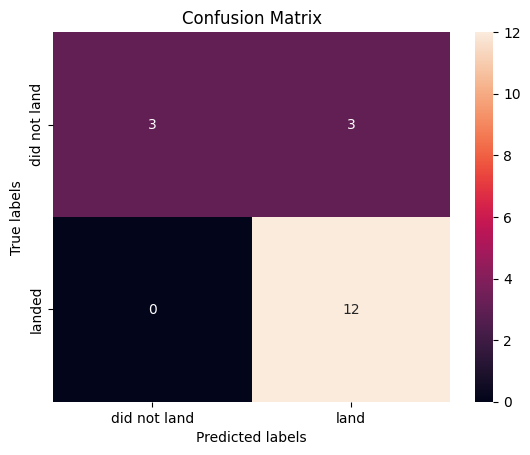

In [512]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [513]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [514]:
# Define the parameter grid (corrected and expanded)
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'C': np.logspace(-3, 3, 5),                      # Regularization: [0.001, 0.1, 1, 10, 1000]
    'gamma': np.logspace(-3, 3, 5),                   # Kernel coefficient: [0.001, 0.1, 1, 10, 1000]
    'class_weight': [None, 'balanced']                # Handle class imbalance
}

# Initialize SVM with probability estimates (for AUC)
svm = SVC(
    probability=True,        # Required for AUC-ROC
    random_state=42          # Reproducibility
)

# Stratified 10-fold CV (preserves class imbalance)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV with AUC-ROC scoring
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=cv,
    # scoring='roc_auc_ovo',   # Multiclass AUC (One-vs-One)
    n_jobs=-1,               # Parallelize
    verbose=1                # Print progress
)

# Fit the model
svm_cv.fit(X_train, Y_train)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [515]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.8642857142857142


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [516]:
svm_best_model =svm_cv.best_estimator_
svm_test_accuracy = svm_best_model.score(X_test, Y_test)
print(f"Test Accuracy: {svm_test_accuracy:.4f}")

Test Accuracy: 0.8333


We can plot the confusion matrix


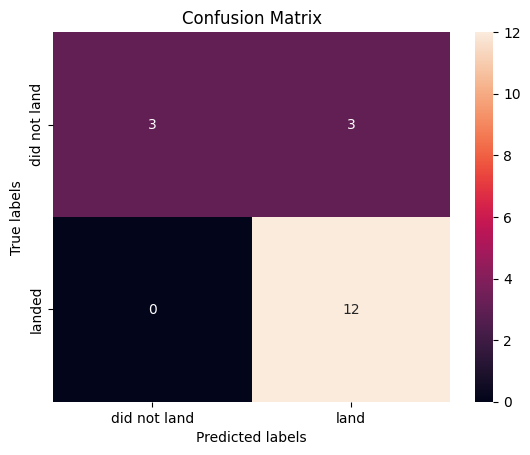

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [517]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_probs = svm_cv.predict_proba(X_test)
# print("Test AUC-ROC:", roc_auc_score(Y_test, y_probs))
print(classification_report(Y_test, yhat))

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [518]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [519]:
parameters = {
    'criterion': ['gini', 'entropy'],       # Splitting quality metrics
    'splitter': ['best', 'random'],         # Node splitting strategy
    'max_depth': [2*n for n in range(1, 10)],  # Tree depth: [2, 4, ..., 18]
    'max_features': ['auto', 'sqrt', None],  # Feature subset size
    'min_samples_leaf': [1, 2, 4],          # Minimum samples per leaf
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'class_weight': [None, 'balanced']      # Handle class imbalance
}

# Initialize Decision Tree (with reproducibility)
tree = DecisionTreeClassifier(
    random_state=42          # Ensure reproducible splits
)

# Stratified 10-fold CV (preserves class distribution)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV with AUC-ROC scoring
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    # scoring='roc_auc_ovo',   # Multiclass AUC (One-vs-One)
    n_jobs=-1,               # Parallelize
    verbose=1                # Print progress
)

# Fit the model
tree_cv.fit(X_train, Y_train)


Fitting 10 folds for each of 1944 candidates, totalling 19440 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6480 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4263 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/si

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [520]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8892857142857142


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [521]:
tree_best_model =tree_cv.best_estimator_
tree_test_accuracy = tree_best_model.score(X_test, Y_test)
print(f"Test Accuracy: {tree_test_accuracy:.4f}")

Test Accuracy: 0.8333


We can plot the confusion matrix


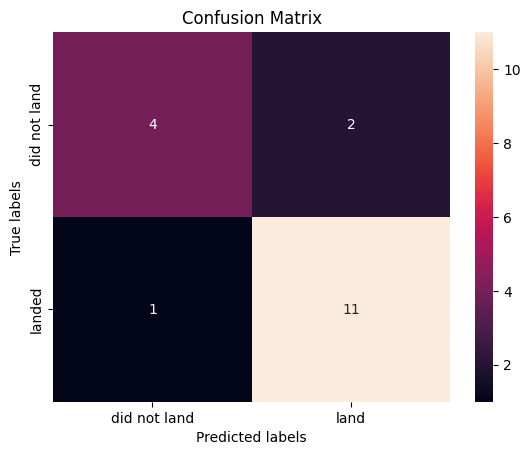

In [522]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [523]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [524]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
parameters = {
    'n_neighbors': list(range(1, 11)),       # K values: 1-10
    'weights': ['uniform', 'distance'],       # Weight by distance (critical for imbalance)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],                             # 1=Manhattan, 2=Euclidean
    'metric': ['minkowski']                  # Default (uses p)
}

# Create a pipeline with scaling (KNN is distance-sensitive!)
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),            # Normalize features
    ('knn', KNeighborsClassifier())          # KNN model
])

# Stratified 10-fold CV (preserves class distribution)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV with AUC-ROC scoring
knn_cv = GridSearchCV(
    estimator=knn_pipe,
    param_grid={'knn__' + key: value for key, value in parameters.items()},
    cv=cv,
    # scoring='roc_auc_ovo',                   # Multiclass AUC
    n_jobs=-1,                               # Parallelize
    verbose=1
)

# Fit the model
knn_cv.fit(X_train, Y_train)



Fitting 10 folds for each of 160 candidates, totalling 1600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__metric': ['minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [525]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'knn__algorithm': 'auto', 'knn__metric': 'minkowski', 'knn__n_neighbors': 4, 'knn__p': 2, 'knn__weights': 'uniform'}
accuracy : 0.8910714285714286


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [526]:
knn_best_model = knn_cv.best_estimator_
knn_test_accuracy = knn_best_model.score(X_test, Y_test)
print(f"Test Accuracy: {knn_test_accuracy:.4f}")

Test Accuracy: 0.7778


We can plot the confusion matrix


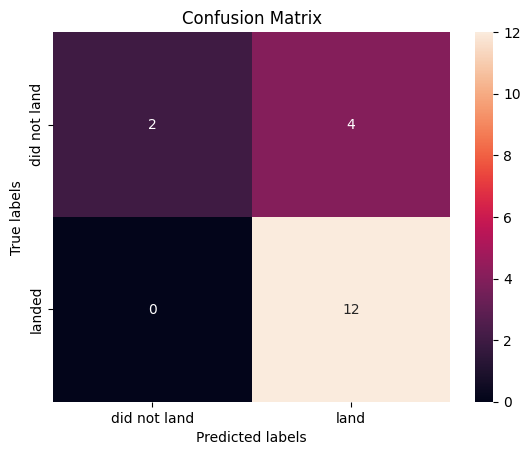

In [527]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


/var/folders/hc/54yv_31d1kz7z8ns718b_gph0000gn/T/ipykernel_28389/2739904443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=test_accuracy, palette='viridis')


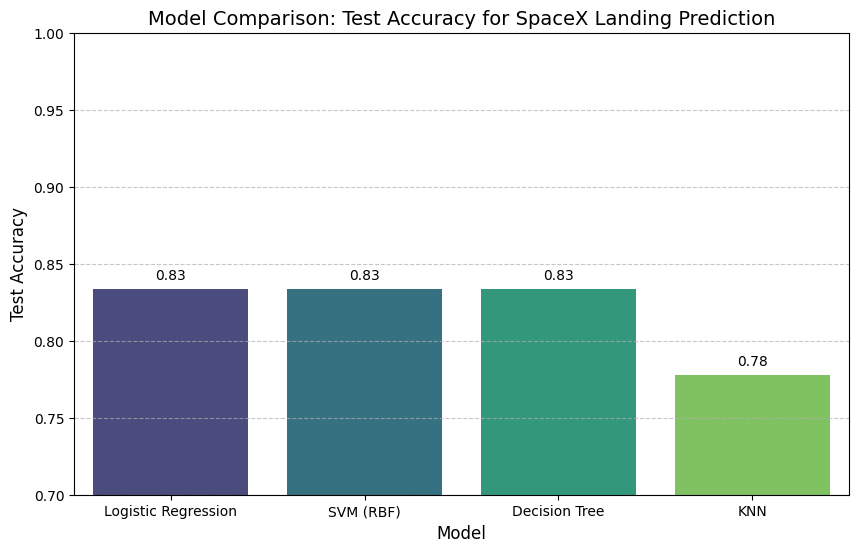

In [528]:
models = ['Logistic Regression', 'SVM (RBF)', 'Decision Tree', 'KNN']
test_accuracy = [logreg_test_accuracy,svm_test_accuracy, tree_test_accuracy, knn_test_accuracy]  # Example values - update with your results

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=test_accuracy, palette='viridis')

# Customize
plt.title('Model Comparison: Test Accuracy for SpaceX Landing Prediction', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)  # Adjust based on your accuracy range

# Add accuracy labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
